In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data_pure=pd.read_csv("energy_dataset.csv", sep=";")

In [3]:
data_pure.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [4]:
data_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35047 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

•	Time: Datetime index localized to CET
•	Generation biomass: biomass generation in MW
•	Generation fossil brown coal/lignite: coal/lignite generation in MW
•	Generation fossil coal-derived gas: coal gas generation in MW
•	Generation fossil gas: gas generation in MW
•	Generation fossil hard coal: coal generation in MW
•	Generation fossil oil: oil generation in MW
•	Generation fossil oil shale: shale oil generation in MW
•	Generation fossil peat: peat generation in MW
•	Generation geotermal: geothermal generation in MW
•	Generation hydro pumped storage aggregated: hydro1 generation in MW
•	Generation hydro pumped storage consumption: hydro2 generation in MW
•	Generation hydro run-of-river and poundage: hydro3 generation in MW
•	Generation hydro water reservoir: hydro4 generation in MW
•	Generation marine: sea generation in MW
•	Generation nuclear: nuclear generation in MW
•	Generation other: other generation in MW
•	Generation other renewable: other renewable generation in MW
•	Generation solar: solar generation in MW
•	Generation waste: waste generation in MW
•	Generation wind offshore: wind offshore generation in MW
•	Generation wind onshore: wind onshore generation in MW
•	Forecast solar day ahead: forecasted solar generation
•	Forecast wind offshore day ahead: forecasted offshore wind generation
•	Forecast wind onshore day ahead: forecasted onshore wind generation
•	Total load forecast: forecasted electrical demand
•	Total load actual: actual electrical demand
•	Price day ahead: forecasted price EUR/MWh
•	Price actual: price in EUR/MWh


In [5]:
#Quitando todas las columnas que estan en blanco
data_pure = data_pure.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation hydro pumped storage aggregated",
                  "generation marine",
                  "generation wind offshore",
                  "forecast wind offshore day ahead"],axis=1)

In [6]:
data_pure.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9,4861,21785,20264.0,38.41,56.04


In [7]:
#Creating a dataset without forecasts, leaving only energy produced, demand, its price, and time
data_energy=data_pure.drop(["forecast solar day ahead",
                  "forecast wind onshore day ahead",
                  "total load forecast",
                  "price day ahead"],axis=1)

In [8]:
data_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04


In [9]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [10]:
#dropping any rows with NaN values
data_energy=data_energy.dropna() 

In [11]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35018 non-null  object 
 1   generation biomass                           35018 non-null  float64
 2   generation fossil brown coal/lignite         35018 non-null  float64
 3   generation fossil gas                        35018 non-null  float64
 4   generation fossil hard coal                  35018 non-null  float64
 5   generation fossil oil                        35018 non-null  float64
 6   generation hydro pumped storage consumption  35018 non-null  float64
 7   generation hydro run-of-river and poundage   35018 non-null  float64
 8   generation hydro water reservoir             35018 non-null  float64
 9   generation nuclear                           35018 non-null  float64
 10

In [12]:
data_energy.to_csv("energy_dataset_treated.csv")

In [13]:
data_energy['time'] = pd.to_datetime(data_energy['time'],utc=True)

In [14]:
data_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04


# Dataset of the First Hour of each Month

In [15]:
#creating a dataset of the first hour of each month
data_last_hour_monthly=data_energy
data_last_hour_monthly.set_index('time')
dates_month = pd.bdate_range(data_last_hour_monthly['time'].min(), data_last_hour_monthly['time'].max(), freq='1M')
data_end_of_month = data_last_hour_monthly[data_last_hour_monthly['time'].isin(dates_month)]
data_end_of_month.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
721,2015-01-31 00:00:00+00:00,401.0,0.0,2693.0,1103.0,200.0,1456.0,1187.0,4783.0,7098.0,39.0,64.0,121.0,200.0,12413.0,26851.0,24.91
1393,2015-02-28 00:00:00+00:00,441.0,0.0,3568.0,2682.0,256.0,934.0,1377.0,4125.0,7106.0,56.0,75.0,67.0,195.0,7287.0,25645.0,40.81
2137,2015-03-31 00:00:00+00:00,429.0,0.0,3665.0,2512.0,314.0,1957.0,1268.0,1182.0,7086.0,81.0,66.0,599.0,135.0,6789.0,22552.0,39.88
2857,2015-04-30 00:00:00+00:00,389.0,946.0,4792.0,6199.0,361.0,790.0,979.0,2110.0,4044.0,41.0,72.0,644.0,198.0,3628.0,22595.0,64.88
3601,2015-05-31 00:00:00+00:00,528.0,888.0,4031.0,4891.0,256.0,1054.0,701.0,1927.0,5442.0,87.0,67.0,605.0,206.0,2837.0,21121.0,57.64


In [16]:
data_end_of_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 721 to 35041
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         48 non-null     datetime64[ns, UTC]
 1   generation biomass                           48 non-null     float64            
 2   generation fossil brown coal/lignite         48 non-null     float64            
 3   generation fossil gas                        48 non-null     float64            
 4   generation fossil hard coal                  48 non-null     float64            
 5   generation fossil oil                        48 non-null     float64            
 6   generation hydro pumped storage consumption  48 non-null     float64            
 7   generation hydro run-of-river and poundage   48 non-null     float64            
 8   generation hydro water rese

In [79]:
data_end_of_month.to_csv("energy_last_hour_every_month.csv")

# Dataset of the First Hour of each Day

In [121]:
#creating a dataset of the first hour of each day
data_last_hour_day=data_energy
data_last_hour_day.set_index('time')
dates_day = pd.bdate_range( pd.to_datetime('2015-01-01 00:00:00+01:00',utc=True), data_last_hour_day['time'].max(), freq='1D')
data_end_of_day = data_last_hour_day[data_last_hour_day['time'].isin(dates_day)]
data_end_of_day.head()
data_energy['time'] = pd.to_datetime(data_energy['time'],utc=True)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
25,2015-01-02 00:00:00+00:00,368.0,0.0,2902.0,1190.0,192.0,1996.0,1263.0,2996.0,7106.0,45.0,61.0,54.0,167.0,12760.0,24935.0,58.46
49,2015-01-03 00:00:00+00:00,463.0,0.0,3812.0,1351.0,245.0,1048.0,1392.0,3482.0,7095.0,78.0,68.0,62.0,198.0,9135.0,23584.0,63.35
73,2015-01-04 00:00:00+00:00,351.0,0.0,3997.0,2755.0,310.0,1257.0,1494.0,1867.0,7087.0,81.0,58.0,684.0,160.0,8080.0,23620.0,50.54
97,2015-01-05 00:00:00+00:00,363.0,104.0,5352.0,3112.0,310.0,938.0,1099.0,2458.0,4029.0,41.0,74.0,668.0,153.0,7403.0,23390.0,64.89


In [122]:
data_end_of_day.to_csv("energy_last_hour_every_day.csv")

# Dataset wit Forecast

In [105]:
data_with_forecast=pd.read_csv("energy_dataset.csv", sep=";")
#Quitando todas las columnas que estan en blanco
data_with_forecast = data_with_forecast.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation hydro pumped storage aggregated",
                  "generation marine",
                  "generation wind offshore",
                  "forecast wind offshore day ahead"],axis=1)

#dropping any rows with NaN values
data_with_forecast=data_with_forecast.dropna() 

data_with_forecast['time'] = pd.to_datetime(data_with_forecast['time'],utc=True)

data_with_forecast



,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17,6436,26118,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16,5856,24934,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8,5454,23515,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2,5151,22642,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96,3253,30619,30653.0,68.85,77.02
35060,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51,3353,29932,29735.0,68.40,76.16
35061,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36,3404,27903,28071.0,66.88,74.30
35062,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29,3273,25450,25801.0,63.93,69.89


Dataset of the first hour of each day with forecast

In [106]:
#creating a dataset of the first hour of each day
data_hour_day_with_forecast=data_with_forecast
data_hour_day_with_forecast.set_index('time')
dates_day_forecast = pd.bdate_range( pd.to_datetime('2015-01-01 00:00:00+01:00',utc=True), data_hour_day_with_forecast['time'].max(), freq='1D')
data_end_of_day_forecast = data_hour_day_with_forecast[data_hour_day_with_forecast['time'].isin(dates_day_forecast)]
data_end_of_day_forecast.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16,5856,24934,24382.0,48.1,64.92
25,2015-01-02 00:00:00+00:00,368.0,0.0,2902.0,1190.0,192.0,1996.0,1263.0,2996.0,7106.0,...,61.0,54.0,167.0,12760.0,35,12718,25397,24935.0,7.0,58.46
49,2015-01-03 00:00:00+00:00,463.0,0.0,3812.0,1351.0,245.0,1048.0,1392.0,3482.0,7095.0,...,68.0,62.0,198.0,9135.0,0,9215,24301,23584.0,27.1,63.35
73,2015-01-04 00:00:00+00:00,351.0,0.0,3997.0,2755.0,310.0,1257.0,1494.0,1867.0,7087.0,...,58.0,684.0,160.0,8080.0,640,8335,23734,23620.0,20.2,50.54
97,2015-01-05 00:00:00+00:00,363.0,104.0,5352.0,3112.0,310.0,938.0,1099.0,2458.0,4029.0,...,74.0,668.0,153.0,7403.0,588,7474,23630,23390.0,35.5,64.89


In [90]:
data_end_of_day_forecast.to_csv("energy_last_hour_every_day_with_forecast.csv")

# Analysis of data without forecast


# Correlacion

In [ ]:
#Changing the data_with_forecast for analysis with numpy
data=data_energy.drop(['time'],axis=1)
data=data.to_numpy()

In [ ]:
cov=np.cov(data.transpose())
cov_inv=np.linalg.inv(cov)
d1=cov.diagonal()
d2=cov_inv.diagonal()
R2=1-np.ones(16)/(np.multiply(d1,d2))
R2

In [19]:
import statsmodels.api as sm
import seaborn as sns

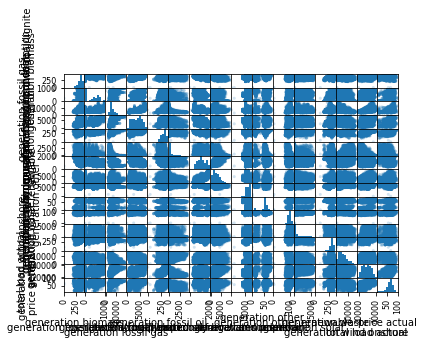

In [20]:
pd.plotting.scatter_matrix(data_energy.iloc[25000:,:], alpha=0.2)
plt.show
plt.savefig("plot_matrix.png", bbox_inches='tight', dpi=600)

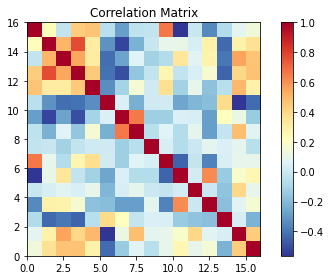

In [21]:
corr = data_energy.set_index('time').corr()
sm.graphics.plot_corr(corr)
plt.show
plt.savefig("correlation.png", bbox_inches='tight', dpi=600)

In [22]:
corr['price actual']

generation biomass                             0.142795
generation fossil brown coal/lignite           0.364205
generation fossil gas                          0.461914
generation fossil hard coal                    0.466703
generation fossil oil                          0.285351
generation hydro pumped storage consumption   -0.427033
generation hydro run-of-river and poundage    -0.136756
generation hydro water reservoir               0.072203
generation nuclear                            -0.051825
generation other                               0.099757
generation other renewable                     0.256400
generation solar                               0.098768
generation waste                               0.169293
generation wind onshore                       -0.221762
total load actual                              0.435872
price actual                                   1.000000
Name: price actual, dtype: float64

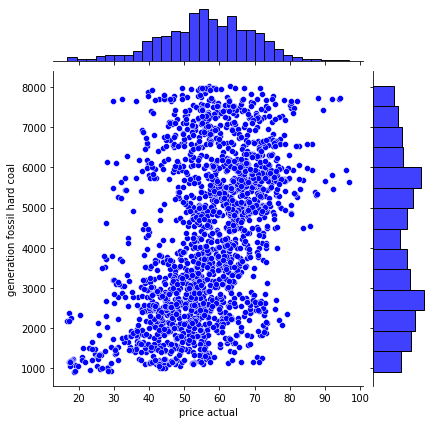

In [25]:
sns.jointplot(x="price actual", y="generation fossil hard coal", data=data_energy[1000:3000], color = "blue", marker="o")
plt.savefig("copula_price_generation_fossil_coal.png", bbox_inches='tight', dpi=600)

In [127]:
corr['total load actual']

generation biomass                             0.083211
generation fossil brown coal/lignite           0.280523
generation fossil gas                          0.548931
generation fossil hard coal                    0.396631
generation fossil oil                          0.497069
generation hydro pumped storage consumption   -0.562786
generation hydro run-of-river and poundage     0.118587
generation hydro water reservoir               0.479485
generation nuclear                             0.085598
generation other                               0.100666
generation other renewable                     0.181692
generation solar                               0.396127
generation waste                               0.077326
generation wind onshore                        0.040043
total load actual                              1.000000
price actual                                   0.435872
Name: total load actual, dtype: float64

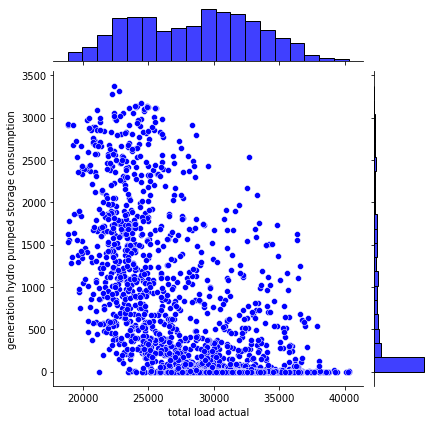

In [27]:
sns.jointplot(x="total load actual", y="generation hydro pumped storage consumption", data=data_energy[1000:3000], color = "blue", marker="o")
plt.savefig("copula_demand_generation_hydro_pumped.png", bbox_inches='tight', dpi=600)

# Rendimiento y precio

In [70]:
#calculando el rendimiento del precio de la energia
rendimiento_precio=[]
precios=data_energy['price actual'].to_numpy()
for i in range(np.size(precios) -1):
    rendimiento_precio.append((precios[i+1]-precios[i])/precios[i])

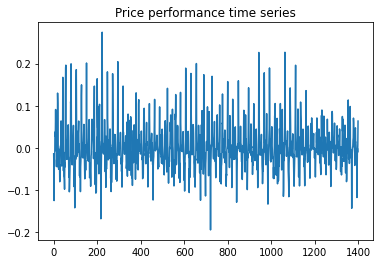

In [71]:
plt.plot(rendimiento_precio[33600:35000]) # plotting by columns
plt.title("Price performance time series")
plt.savefig("rendimiento_precio_serie_tiempo.png", bbox_inches='tight', dpi=600)
plt.show()

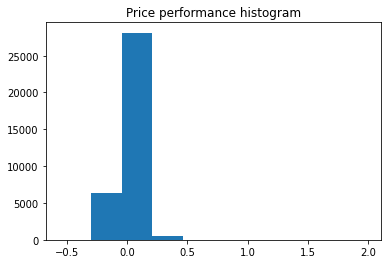

In [72]:
plt.hist(rendimiento_precio) # plotting by columns
plt.title("Price performance histogram")
plt.savefig("rendimiento_precio_histograma.png", bbox_inches='tight', dpi=600)
plt.show()

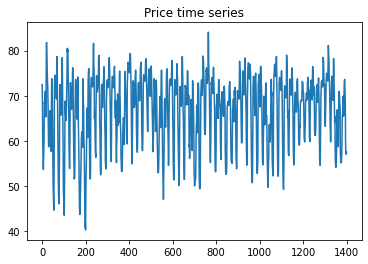

In [61]:
plt.plot(precios[33600:35000]) # plotting by columns
plt.title("Price time series")
plt.savefig("precios_serie_tiempo.png", bbox_inches='tight', dpi=600)
plt.show()

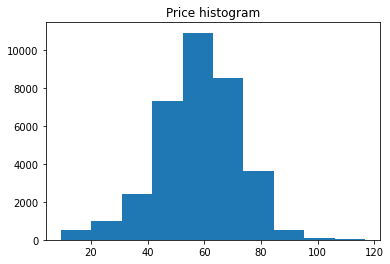

In [62]:
plt.hist(precios) # plotting by columns
plt.title("Price histogram")
plt.savefig("precios_histograma.png", bbox_inches='tight', dpi=600)
plt.show()

In [63]:
#calculando el rendimiento del precio de la energia
rendimiento_demanda=[]
demanda=data_energy['total load actual'].to_numpy()
for i in range(np.size(demanda) -1):
    rendimiento_demanda.append((demanda[i+1]-demanda[i])/demanda[i])

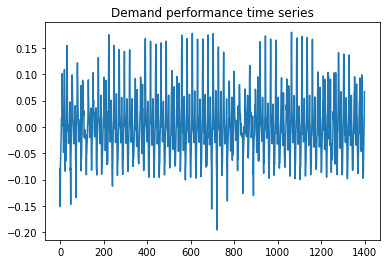

In [64]:
plt.plot(rendimiento_demanda[33600:35000]) # plotting by columns
plt.title("Demand performance time series")
plt.savefig("rendimiento_demanda_serie_tiempo.png", bbox_inches='tight', dpi=600)
plt.show()

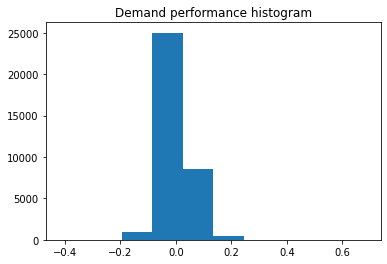

In [65]:
plt.hist(rendimiento_demanda) # plotting by columns
plt.title("Demand performance histogram")
plt.savefig("rendimiento_demanda_histograma.png", bbox_inches='tight', dpi=600)
plt.show()

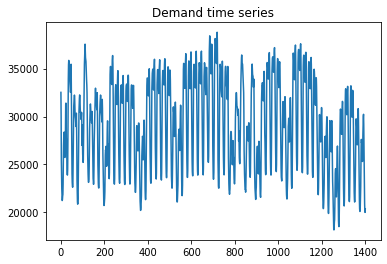

In [66]:
plt.plot(demanda[33600:35000]) # plotting by columns
plt.title("Demand time series")
plt.savefig("demanda_serie_tiempo.png", bbox_inches='tight', dpi=600)
plt.show()

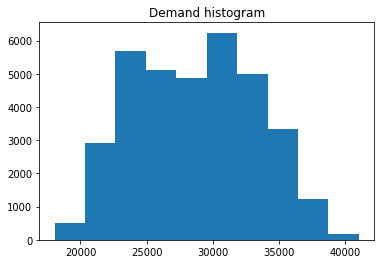

In [67]:
plt.hist(demanda) # plotting by columns
plt.title("Demand histogram")
plt.savefig("demanda_histogra.png", bbox_inches='tight', dpi=600)
plt.show()

In [68]:
import dc_stat_think as dcst

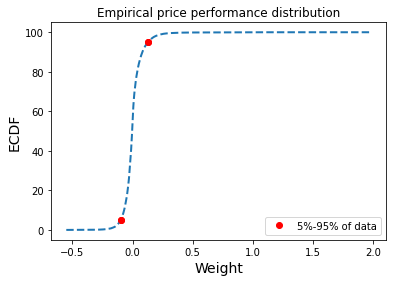

In [73]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(rendimiento_precio)
percentiles = np.array([5,95])
pct_val = np.percentile(rendimiento_precio, percentiles)
# Plot the ECDF as dots
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
# Label axes and show plot from 5%-95% IC
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.title("Empirical price performance distribution")
plt.legend(['5%-95% of data'])
plt.savefig("Empirical_price_performce_distribution.png", bbox_inches='tight', dpi=600)
plt.show()

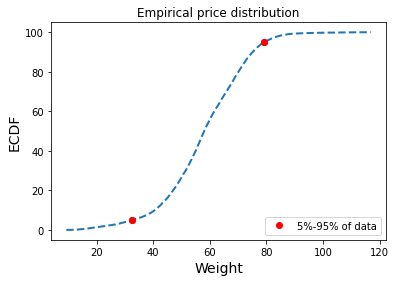

In [57]:
x, y = dcst.ecdf(precios)
# Plot the ECDF as dots
percentiles = np.array([5,95])
pct_val = np.percentile(precios, percentiles)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
# Label axes and show plot
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.title("Empirical price distribution")
plt.legend(['5%-95% of data'],loc=4)
plt.savefig("Empirical_price_distribution.png", bbox_inches='tight', dpi=600)
plt.show()

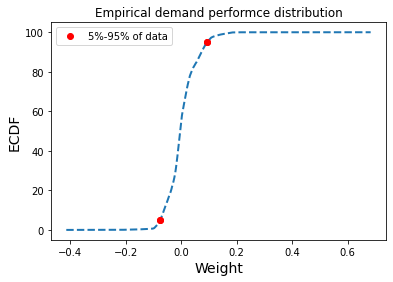

In [74]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(rendimiento_demanda)
percentiles = np.array([5,95])
pct_val = np.percentile(rendimiento_demanda, percentiles)
# Plot the ECDF as dots
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
# Label axes and show plot from 5%-95% IC
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.title("Empirical demand performce distribution")
plt.legend(['5%-95% of data'])
plt.savefig("Empirical_price_performce_distribution.png", bbox_inches='tight', dpi=600)
plt.show()

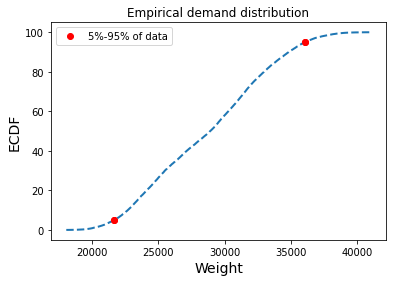

In [88]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(demanda)
percentiles = np.array([5,95])
pct_val = np.percentile(demanda, percentiles)
# Plot the ECDF as dots
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
# Label axes and show plot from 5%-95% IC
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.title("Empirical demand distribution")
plt.legend(['5%-95% of data'])
plt.savefig("Empirical_price_performance_distribution.png", bbox_inches='tight', dpi=600)
plt.show()

# Weather


In [77]:
data_weather=pd.read_csv("data_weather.csv", sep=";")
data_weather['dt_iso'] = pd.to_datetime(data_weather['dt_iso'],utc=True)
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35018 entries, 0 to 35017
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt_iso               35018 non-null  datetime64[ns, UTC]
 1   city_name            35018 non-null  object             
 2   temp                 35018 non-null  float64            
 3   temp_min             35018 non-null  float64            
 4   temp_max             35018 non-null  float64            
 5   pressure             35018 non-null  int64              
 6   humidity             35018 non-null  int64              
 7   wind_speed           35018 non-null  int64              
 8   wind_deg             35018 non-null  int64              
 9   rain_1h              35018 non-null  float64            
 10  rain_3h              35018 non-null  float64            
 11  snow_3h              35018 non-null  float64            
 12  clouds_all        

In [78]:
#quitando columnas innecesarias
data_weather = data_weather.drop(["dt_iso",
                  "city_name"],axis=1)


In [79]:
from sklearn import preprocessing

In [80]:
#Convertimos las variables categóricas a númericas para poder procesarlas
var_objects = data_weather.dtypes==object
var_cols = data_weather.columns[var_objects].tolist()

le = preprocessing.LabelEncoder()

data_weather[var_cols] = data_weather[var_cols].apply(lambda col: le.fit_transform(col))

In [82]:
data_weather

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,17,1
1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,17,1
2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,17,1
3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,17,1
4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35013,285.640,285.150,286.150,1028,62,2,140,0.0,0.0,0.0,0,800,0,17,1
35014,283.140,282.150,284.150,1029,71,1,242,0.0,0.0,0.0,0,800,0,17,1
35015,281.660,281.150,282.150,1029,81,3,300,0.0,0.0,0.0,0,800,0,17,1
35016,280.140,279.150,281.150,1029,81,2,310,0.0,0.0,0.0,0,800,0,17,1


In [81]:
data_weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
count,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,290.790608,290.232235,291.364570,1015.986179,65.096665,2.692387,160.736364,0.034478,0.000226,0.000154,20.747159,782.173425,0.862556,10.366640,3.732052
std,7.233808,7.089812,7.522657,11.939170,19.677740,2.583226,120.420795,0.263753,0.003534,0.011920,25.602385,76.812518,1.403180,7.238112,4.420539
min,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000
25%,285.150000,285.150000,285.659000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000,0.000000,2.000000,1.000000
50%,290.212000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000,1.000000,15.000000,2.000000
75%,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000,1.000000,17.000000,5.000000
max,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000,8.000000,23.000000,20.000000


# Analysis with Forecast


In [109]:
#Changing the data for analysis with numpy
data_forecast=data_with_forecast.drop(['time'],axis=1)
data_forecast=data_forecast.to_numpy()

Coeficiente de Explicacion por las otras variables de data energy with forecast

In [110]:
cov=np.cov(data_forecast.transpose())
cov_inv=np.linalg.inv(cov)
d1=cov.diagonal()
d2=cov_inv.diagonal()
R2=1-np.ones(20)/(np.multiply(d1,d2))
R2

array([0.67416548, 0.6583853 , 0.74044234, 0.82095244, 0.48689031,
       0.617835  , 0.68024413, 0.77655237, 0.25503896, 0.48258698,
       0.69591328, 0.98705689, 0.54549658, 0.98967472, 0.98722257,
       0.98946403, 0.99053822, 0.99132079, 0.82079367, 0.57319966])

# Analysis with weather and forecast

In [112]:
data_forecast_weather = pd.concat([data_weather, data_with_forecast], axis=1, join='inner')
data_forecast_weather=data_forecast_weather.dropna()
data_forecast_weather=data_forecast_weather.set_index('time')
data_forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34972 entries, 2014-12-31 23:00:00+00:00 to 2018-12-30 00:00:00+00:00
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   temp                                         34972 non-null  float64
 1   temp_min                                     34972 non-null  float64
 2   temp_max                                     34972 non-null  float64
 3   pressure                                     34972 non-null  int64  
 4   humidity                                     34972 non-null  int64  
 5   wind_speed                                   34972 non-null  int64  
 6   wind_deg                                     34972 non-null  int64  
 7   rain_1h                                      34972 non-null  float64
 8   rain_3h                                      34972 non-null  float64
 9   snow_3h                  

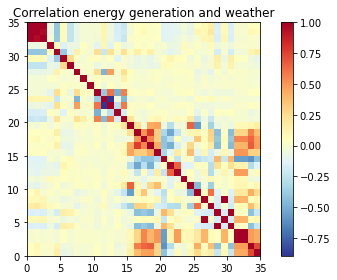

In [113]:
corr = data_forecast_weather.corr()
sm.graphics.plot_corr(corr)
plt.show
plt.savefig("correlation_weather.png", bbox_inches='tight', dpi=600)
plt.title("Correlation energy generation and weather")
plt.savefig("Correlation_energy_and_weather.png", bbox_inches='tight', dpi=600)

Coeficiente de Explicacion por las otras variables

In [115]:
#Changing the data for analysis with numpy
data=data_forecast_weather.to_numpy()

In [118]:
cov=np.cov(data.transpose())
cov_inv=np.linalg.inv(cov)
d1=cov.diagonal()
d2=cov_inv.diagonal()
R2=1-np.ones(35)/(np.multiply(d1,d2))
R2

array([0.9986668 , 0.99487807, 0.99541001, 0.09027265, 0.43138503,
       0.2616433 , 0.16386504, 0.26747573, 0.03489923, 0.00731943,
       0.57999715, 0.89163234, 0.91956132, 0.51481728, 0.55628905,
       0.67876155, 0.66055315, 0.74304021, 0.82450893, 0.49419051,
       0.62311114, 0.6840174 , 0.7827956 , 0.26675962, 0.48736182,
       0.70824492, 0.98709943, 0.56518737, 0.98973373, 0.98726493,
       0.98949828, 0.99058472, 0.99138729, 0.82410432, 0.6018289 ])

# Data dimension

In [119]:
from scipy.spatial.distance import cdist

In [ ]:
cdist(data,data,'mahalanobis')